# Exploring the Image Data Resource

For downloading images from the [image data resource (IDR)](https://idr.openmicroscopy.org/), you only need a link, e.g. for requesting the data in tif format. You can then use [scikit-image](https://scikit-image.org/) to open the image.

Some of the code examples shown below were adaped from the [IDR API website](https://idr.openmicroscopy.org/about/api.html) licensed by the University of Dundee & Open Microscopy Environment under the [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

In the following example, we download image data from Stojic et al shared under the [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/) available from the IDR under this URL: https://idr.openmicroscopy.org/webclient/?show=screen-2302 See also the related publication: https://www.nature.com/articles/s41467-020-14978-7

In [1]:
from skimage.io import imread, imshow
import json
import requests


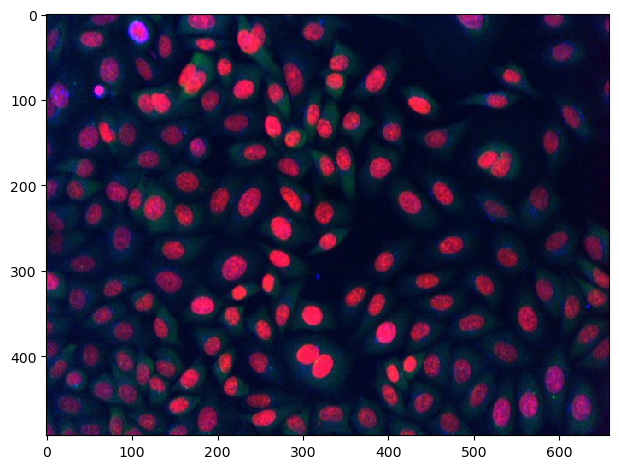

In [2]:
original_link = 'https://idr.openmicroscopy.org/webclient/render_image_download/9629351/?format=tif'
edited_link = 'https://idr.openmicroscopy.org/webclient/render_image/9629351/'

image = imread(edited_link)

imshow(image)

Furthermore, can assemble the link from a generic link if you know the image identifier of the image you want to download.

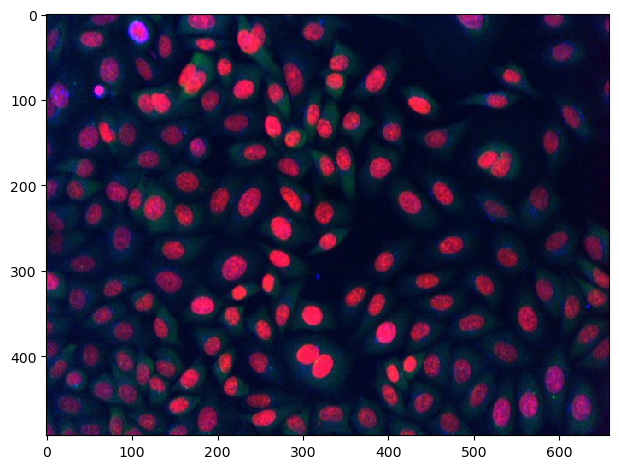

In [3]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"
image_id = 9629351

# combine generic url with image ID
image_url = generic_image_url.format(**{"image_id":image_id})

# download and show image
image = imread(image_url)
imshow(image)

The IDR [application programing interface (API)](https://idr.openmicroscopy.org/about/api.html) also allows you to technically browse the database. The image shown above is part of screen 2303. First, we will have a look at the meta data annotation provided with this dataset.

In [4]:
# configure which dataset to browse
screen_id = 2302
MAP_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&{type}={screen_id}"

# open an interface to the internet
with requests.Session() as session:

    # turn the generic MAP_URL into a specific URL for the screen
    qs = {'type': 'screen', 'screen_id': screen_id}
    url = MAP_URL.format(**qs)

    # go throuh all annotations and print them out
    for a in session.get(url).json()['annotations']:
        namespace = a['ns']
        for v in a['values']:
            key = v[0]
            value = v[1]
            print (key, value)

Screen A https://idr.openmicroscopy.org/webclient/?show=screen-2301
Screen B https://idr.openmicroscopy.org/webclient/?show=screen-2302
Screen C https://idr.openmicroscopy.org/webclient/?show=screen-2303
Overview https://idr.openmicroscopy.org/webclient/?show=screen-2304
Sample Type cell
Organism Homo sapiens
Study Title Identification of long noncoding RNAs in regulation of cell division
Study Type high content screen
Screen Type primary screen
Screen Technology Type RNAi screen
Imaging Method spinning disk confocal microscopy
Publication Title A long noncoding RNA regulates microtubule behaviour during mitosis
Publication Authors Stojic L, Lun ATL, Mascalchi P, Ernst C, Redmond AM, Mangei J, Cooper S, Barr AR, Taylor C, Franklin VNR, Bakal C, Marioni JC, Odom DT, Gergely F
PubMed ID 32296040 https://www.ncbi.nlm.nih.gov/pubmed/32296040
PMC ID PMC7160116 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7160116
Publication DOI 10.1038/s41467-020-14978-7 https://doi.org/10.1038/s41467-020-1

Next, we can go through sub-datasets. We are looking at a [high content screening](https://en.wikipedia.org/wiki/High-content_screening) (HCS) data set, which typically are organized in plates. A for loop allows us to take a look at available plates.

In [5]:
PLATES_URL = "https://idr.openmicroscopy.org/webclient/api/plates/?id={screen_id}"
qs = {'screen_id': screen_id}

# assemble a specific ULR from the generic URL
url = PLATES_URL.format(**qs)

# go through all plates
for p in session.get(url).json()['plates']:
    plate_id = p['id'] # note, we will use this variable further down
    print (p['id'], p['name'], p['childCount'])

7361 1977 1
7368 1978 1
7366 1981 1
7367 1982 1
7379 1983 0
7369 1984 1
7371 1985 1
7370 1986 1
7372 1987 1
7375 1988 1


Plates are organized in wells (in the digitaly world you could call them tables) and thus, we can go through all wells in a similar way like going through plates. This time, we will stop after the first row of images to just see a couple of small thumbnails of them. Looking at thumbnails makes a lot of sense as long as you don't need the full image data and are just browsing the database.



9762957


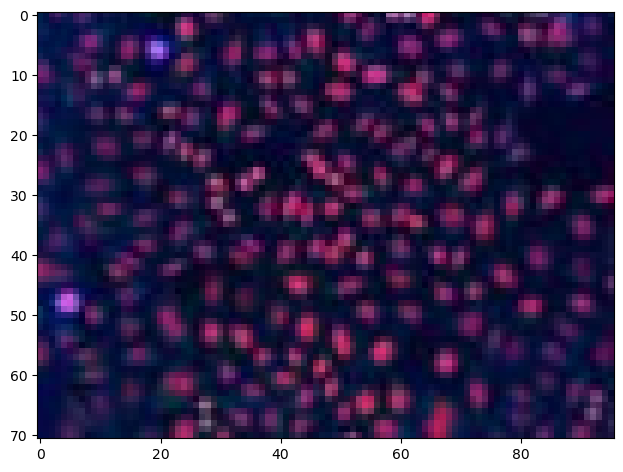

In [6]:
WELLS_IMAGES_URL = "https://idr.openmicroscopy.org/webgateway/plate/{plate_id}/{field}/"
THUMBNAIL_URL = "https://idr.openmicroscopy.org/webclient/render_thumbnail/{image_id}/"

qs = {'plate_id': plate_id, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()
rowlabels = grid['rowlabels']
collabels = grid['collabels']

# go through the well of images.
for row in grid['grid']:
    for cell in row:
        if cell is not None:
            # read image specific information we will use this variable further down
            image_id = cell['id']

            # print image ID and show thumbnail
            print(image_id)
            thumbnail = imread(THUMBNAIL_URL.format(**{'image_id':image_id}))
            imshow(thumbnail)

            # leave after first image
            break

    # leave after first row
    break

In order to retrieve the whole image, we can use the code shown on top.

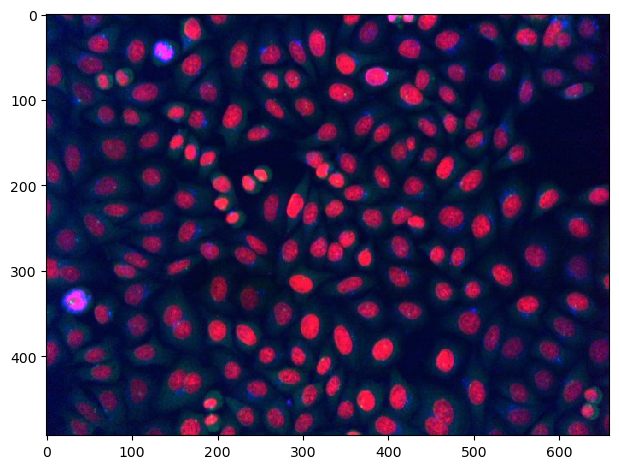

In [7]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"

# combine generic url with image ID
image_url = generic_image_url.format(**{"image_id":image_id})

# download and show image
image = imread(image_url)
imshow(image)

Furthermore, we can print out the meta data using [json](https://www.json.org/json-en.html). Note: We can have a look at the meta data without downloading the image.

In [8]:
qs = {'image_id': image_id}
IMAGE_DETAILS_URL = "https://idr.openmicroscopy.org/webclient/imgData/{image_id}/"
url = IMAGE_DETAILS_URL.format(**qs)
r = session.get(url)
if r.status_code == 200:
    print (json.dumps(r.json(), indent=4, sort_keys=True))

{
    "channels": [
        {
            "active": true,
            "coefficient": 1.0,
            "color": "FF0000",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "alpha-tubulin (microtubule cytoskeleton)",
            "reverseIntensity": false,
            "window": {
                "end": 187.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "coefficient": 1.0,
            "color": "00FF00",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "gamma-tubulin (centrosomes)",
            "reverseIntensity": false,
            "window": {
                "end": 342.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "co